# 신용거래 이상탐지 데이터 다루기

거래 시간, 거래 유형, 결제 금액, 위치 등 다양한 feature를 활용해 사기 거래 식별

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Pandas 출력 옵션 설정
pd.set_option('display.max_columns', None)         # 모든 열 출력
pd.set_option('display.max_rows', None)            # 모든 행 출력
pd.set_option('display.width', 1000)               # 출력 너비 확장
pd.set_option('display.max_colwidth', None)        # 열 너비 제한 해제
pd.set_option('display.max_info_columns', 1000)    # info() 출력 시 최대 열 개수 확장

### 데이터 범주

#### 시계열
trans_date_trans_time : 거래 날짜 및 시간

#### 범주형
merchant : 상인

category : 업종

trans_num : 거래번호

job : 카드 소지자의 직업

dob : 카드 소지자의 생년월일

first : 카드 소지자의 이름

last : 키드 소지자의 성

gender : 카드 소지자의 성별

street : 카드 소지자의 주소

city : 카드 소지자의 도시

state : 카드 소지자의 주

#### 숫자형
cc_num : 고객의 카드 번호

zip : 해당 지역 식별자

lat : 카드 소지자의 위도

long : 카드 소지자의 경도

city_pop : 카드 소지자의 도시 인구

amt : 거래 총 액수

unix_time : 거래 UNIX 시간

merch_lat : 가게 위도

merch_long : 거래 경도

is_fraud : 사기 유무

In [11]:
# 데이터 불러오기
df = pd.read_csv('/Users/mac/Documents/GitHub/python-training/notebooks/fraud.csv')
df.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
5,2019-01-01 00:26:22,3598215285024754,fraud_Heidenreich PLC,grocery_pos,207.36,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,f246ac27c09429ff1e385d4683c79c4d,1325377582,40.202538,-73.859212,0
6,2019-01-01 00:27:45,213141712584544,fraud_Halvorson Group,misc_pos,181.35,Margaret,Curtis,F,742 Oneill Shore,Florence,MS,39073,32.1530,-90.1217,19685,Fine artist,1984-12-24,7bb25a43205191eb7344282b88fc54d3,1325377665,31.939812,-90.726209,0
7,2019-01-01 00:30:49,676372984911,"fraud_Christiansen, Goyette and Schamberger",gas_transport,53.60,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,Esbon,KS,66941,39.7562,-98.4462,242,Tourism officer,1987-07-18,f1566e9623814dd277dfa2a9bf83ea36,1325377849,40.332519,-99.062962,0
8,2019-01-01 00:31:51,4642255475285942,fraud_Ledner-Pfannerstill,gas_transport,102.13,Sabrina,Johnson,F,320 Nicholson Orchard,Thompson,UT,84540,38.9999,-109.6150,46,"Surveyor, minerals",1987-04-23,47238da5b40d126c8abea40a857c7809,1325377911,39.807313,-109.348294,0
9,2019-01-01 00:34:10,3553629419254918,fraud_Stracke-Lemke,grocery_pos,83.07,Sharon,Johnson,F,7202 Jeffrey Mills,Conway,WA,98238,48.3400,-122.3456,85,"Research officer, political party",1984-09-01,9b7a0619dcc5c572dc134f2827ed5a6b,1325378050,48.682111,-122.719904,0


## 데이터 탐색

In [12]:
# category 목록 확인
df.loc[:, 'category'].value_counts()

category
shopping_pos      48345
gas_transport     46029
home              43340
grocery_pos       42722
kids_pets         40295
shopping_net      39179
food_dining       35980
personal_care     35513
entertainment     33619
misc_pos          32411
health_fitness    31415
misc_net          25179
grocery_net       24486
travel            12621
Name: count, dtype: int64

In [13]:
# cc_num 목록 확인
df.loc[:, 'cc_num'].value_counts()

cc_num
6538441737335434       4392
30270432095985         4392
4364010865167176       4386
4642255475285942       4386
6538891242532018       4386
6011438889172900       4385
344709867813900        4385
4904681492230012       4384
4586810168620942       4384
4745996322265          4384
4512828414983801773    4384
6534628260579800       4383
36722699017270         4383
342952484382519        4382
180048185037117        4382
3553629419254918       4381
3560797065840735       4381
213112402583773        4380
6011504998544485       4380
6011367958204270       4380
3575789281659026       4380
3583635130604947       4380
6011652924285713       4379
372509258176510        4379
180094419304907        4378
376445266762684        4378
345933964507467        4378
2242542703101233       4377
4836998673805450       4377
372520049757633        4376
630424987505           4376
3596217206093829       4375
4908846471916297       4375
6011893664860915       4375
30273037698427         4375
3551217896304

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [15]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


## 데이터셋 시각화
* countplot 'is_fraud'
* 수치형 칼럼, is_fraud칼럼 -> scatter plot
* 범주형 칼럼, is_fraud칼럼 -> box plot
* 각 features -> 상관관계 분석

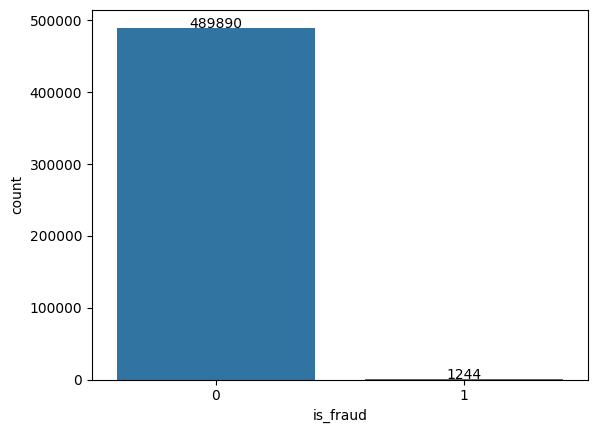

In [16]:
# is_fraud 데이터셋 boxplot
ax = sns.countplot(data=df, x='is_fraud')

# 각 막대 위에 숫자 표시
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # 막대의 x 위치
            p.get_height() + 0.1,          # 막대의 높이 바로 위
            int(p.get_height()),           # 표시할 값 (막대의 높이)
            ha='center')                   # 텍스트 정렬 (가운데 정렬)